##Merge all the CSV data files provided and create a DataFrame:

In [1]:
import os
import pandas as pd
# Function to merge CSV files in a folder
def merge_csv_files(folder_path):
    try:
        # List all CSV files in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

        # Initialize an empty list to store DataFrame objects
        dfs = []

        # Read each CSV file and append its DataFrame to the list
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            try:
                # Try reading the CSV file with different encodings
                df = pd.read_csv(file_path, encoding='utf-8')
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='latin-1')
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='ISO-8859-1')
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        merged_df = pd.concat(dfs, ignore_index=True)
        
        return merged_df
    except Exception as e:
        print("An error occurred:", e)

# Specify the folder path containing CSV files
folder_path = 'C:/Users/hp/Desktop/INDUSTRIAL HUMAN RESOURCE MANAGEMENT'

# Merge CSV files in the folder
merged_df = merge_csv_files(folder_path)



In [2]:
merged_df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,NaN,NaN,NaN
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,NaN,NaN,NaN
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,NaN,NaN,NaN
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,NaN,NaN,NaN
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366010,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,0,0,0,0,0,0,0,District,Purba Medinipur,NaN
1366011,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,...,17103,22057,7272,14785,3534,1216,2318,District,Purba Medinipur,NaN
1366012,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,...,17103,22057,7272,14785,3534,1216,2318,District,Purba Medinipur,NaN
1366013,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,11520,13204,2934,10270,1668,418,1250,District,Purba Medinipur,NaN


In [3]:
# Separate state and district names
merged_df[['STATE', 'District']] = merged_df['India/States'].str.split(' - ', expand=True)

# Function to separate state and district names
def separate_state_district(row):
    # Split the string based on the separator '-'
    parts = row.split(' - ')
    
    # If the first part is in uppercase (assumed to be state name), return it
    if parts[0].isupper():
        return parts[0]
    else:
        return None

# Apply the function to create a new column for state names
merged_df['State Name'] = merged_df['District'].apply(separate_state_district)

# Filter out None values and then print unique state names with commas
state_names = merged_df['State Name'].dropna().unique()
print(", ".join(state_names))

NCT OF DELHI, TRIPURA, JHARKHAND, GUJARAT, MAHARASHTRA, KARNATAKA, GOA, KERALA, TAMIL NADU, PUDUCHERRY, HIMACHAL PRADESH, UTTARAKHAND, UTTAR PRADESH, BIHAR, SIKKIM, NAGALAND, ASSAM, ODISHA, RAJASTHAN, ARUNACHAL PRADESH, MANIPUR, MIZORAM, WEST BENGAL


In [4]:
# Save DataFrame to CSV
merged_df.to_csv('human_resource2.csv', index=False)

Perform Data Exploration (EDA):

In [5]:
merged_df["India/States"].unique()

array(['STATE - NCT OF DELHI', 'District - North West',
       'District - North', 'District - North East', 'District - East',
       'District - New Delhi', 'District - Central', 'District - West',
       'District - South West', 'District - South', 'STATE - TRIPURA',
       'District - West Tripura', 'District - South Tripura',
       'District - Dhalai', 'District - North Tripura',
       'STATE - JHARKHAND', 'District - Garhwa', 'District - Chatra',
       'District - Kodarma', 'District - Giridih', 'District - Deoghar',
       'District - Godda', 'District - Sahibganj', 'District - Pakur',
       'District - Dhanbad', 'District - Bokaro', 'District - Lohardaga',
       'District - Purbi Singhbhum', 'District - Palamu',
       'District - Latehar', 'District - Hazaribagh',
       'District - Ramgarh', 'District - Dumka', 'District - Jamtara',
       'District - Ranchi', 'District - Khunti', 'District - Gumla',
       'District - Simdega', 'District - Pashchimi Singhbhum',
       'D

In [6]:
# Function to extract unique state names from the "India/States" column
def extract_states(data):
    # Split the entries by the string " - "
    split_data = data.str.split(" - ", expand=True)
    
    # The first part of the split will contain the state names
    states = split_data.iloc[:, 0].unique()
    
    return states

# Extract unique state names
unique_states = extract_states(merged_df["India/States"])
print(unique_states)

['STATE' 'District']


In [7]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District',
       'State Name'],
      dtype='object')

In [8]:
# Data Exploration
merged_df.head() # Display the first few rows of the merged DataFrame
#print(merged_df.info()) # Display information about the DataFrame (e.g., data types, missing values)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,STATE,NCT OF DELHI,NCT OF DELHI
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,STATE,NCT OF DELHI,NCT OF DELHI
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,STATE,NCT OF DELHI,NCT OF DELHI
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,STATE,NCT OF DELHI,NCT OF DELHI
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,STATE,NCT OF DELHI,NCT OF DELHI


In [9]:
merged_df["State Code"].unique()

array(['`07', '`16', '`20', '`24', '`27', '`29', '`30', '`32', '`33',
       '`34', '`02', '`05', '`09', '`10', '`11', '`13', '`18', '`21',
       '`08', '`12', '`14', '`15', '`19'], dtype=object)

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366015 entries, 0 to 1366014
Data columns (total 28 columns):
 #   Column                               Non-Null Count    Dtype 
---  ------                               --------------    ----- 
 0   State Code                           1366015 non-null  object
 1   District Code                        1366015 non-null  object
 2   India/States                         1366015 non-null  object
 3   Division                             1366015 non-null  object
 4   Group                                1366015 non-null  object
 5   Class                                1366015 non-null  object
 6   NIC Name                             1366015 non-null  object
 7   Main Workers - Total -  Persons      1366015 non-null  int64 
 8   Main Workers - Total - Males         1366015 non-null  int64 
 9   Main Workers - Total - Females       1366015 non-null  int64 
 10  Main Workers - Rural -  Persons      1366015 non-null  int64 
 11  Main Worker

In [11]:
# Handling Missing Values
# Check for missing values in the DataFrame
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 State Code                                   0
District Code                                0
India/States                                 0
Division                                     0
Group                                        0
Class                                        0
NIC Name                                     0
Main Workers - Total -  Persons              0
Main Workers - Total - Males                 0
Main Workers - Total - Females               0
Main Workers - Rural -  Persons              0
Main Workers - Rural - Males                 0
Main Workers - Rural - Females               0
Main Workers - Urban -  Persons              0
Main Workers - Urban - Males                 0
Main Workers - Urban - Females               0
Marginal Workers - Total -  Persons          0
Marginal Workers - Total - Males             0
Marginal Workers - Total - Females           0
Marginal Workers - Rural -  Persons          0
Marginal Workers - Rural - Males           

In [12]:
# Removing Duplicates
# Check for duplicate rows in the DataFrame
duplicate_rows = merged_df.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0          False
1          False
2          False
3          False
4          False
           ...  
1366010     True
1366011     True
1366012     True
1366013     True
1366014     True
Length: 1366015, dtype: bool


In [13]:
# Summary statistics
summary_stats = merged_df.describe()
print(summary_stats)

       Main Workers - Total -  Persons  Main Workers - Total - Males  \
count                     1.366015e+06                  1.366015e+06   
mean                      1.492138e+03                  1.193171e+03   
std                       4.568159e+04                  3.773909e+04   
min                       0.000000e+00                  0.000000e+00   
25%                       6.000000e+00                  6.000000e+00   
50%                       2.800000e+01                  2.300000e+01   
75%                       1.880000e+02                  1.450000e+02   
max                       1.561976e+07                  1.280140e+07   

       Main Workers - Total - Females  Main Workers - Rural -  Persons  \
count                    1.366015e+06                     1.366015e+06   
mean                     2.989664e+02                     6.606187e+02   
std                      8.582000e+03                     2.044432e+04   
min                      0.000000e+00                  

In [14]:
merged_df.describe(include="all")

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name
count,1366015,1366015,1366015,1366015,1366015,1366015,1366015,1.366015e+06,1.366015e+06,1.366015e+06,...,1.366015e+06,1.366015e+06,1.366015e+06,1.366015e+06,1.366015e+06,1.366015e+06,1.366015e+06,1366015,1366015,103005
unique,23,472,491,89,241,423,587,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,491,23
top,`08,`000,STATE - WEST BENGAL,`47,`000,`0000,Construction of buildings,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,District,WEST BENGAL,WEST BENGAL
freq,151634,103005,5243,85722,221774,678468,10122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1263010,5243,5243
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492138e+03,1.193171e+03,2.989664e+02,...,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,6.610809e+01,4.793047e+01,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.568159e+04,3.773909e+04,8.582000e+03,...,6.309685e+03,8.232256e+03,3.723070e+03,4.748450e+03,3.842880e+03,2.132577e+03,1.803267e+03,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+01,2.300000e+01,3.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.880000e+02,1.450000e+02,2.400000e+01,...,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000e+00,2.000000e+00,NaN,NaN,NaN


In [15]:
# Create a new feature for total number of workers

merged_df['Total_workers'] = (merged_df['Main Workers - Total -  Persons'] + merged_df['Marginal Workers - Total -  Persons'])

Visualization

In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


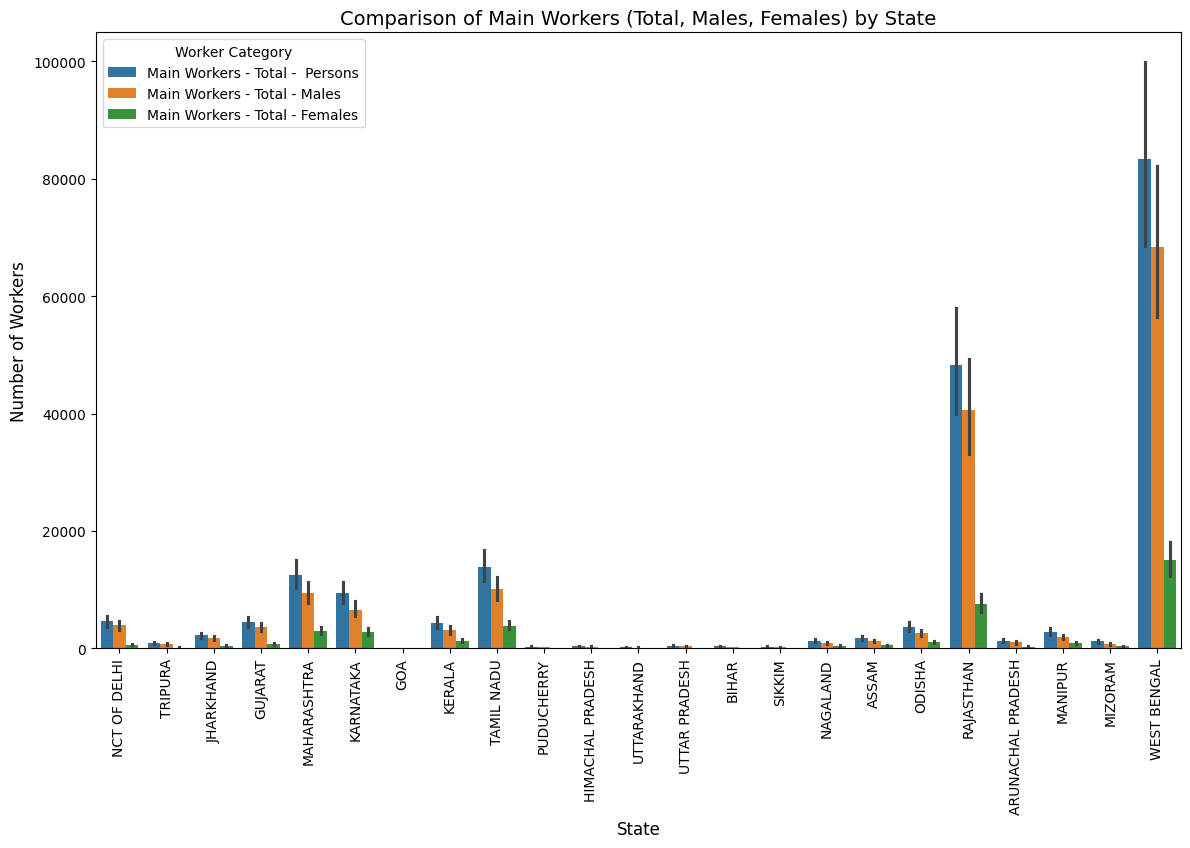

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Main Workers-Total
# Set the figure size
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=merged_df.melt(id_vars=['State Name'], value_vars=['Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females']), 
            x='State Name', y='value', hue='variable')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.title('Comparison of Main Workers (Total, Males, Females) by State', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.legend(title='Worker Category')

# Show the plot
plt.show()


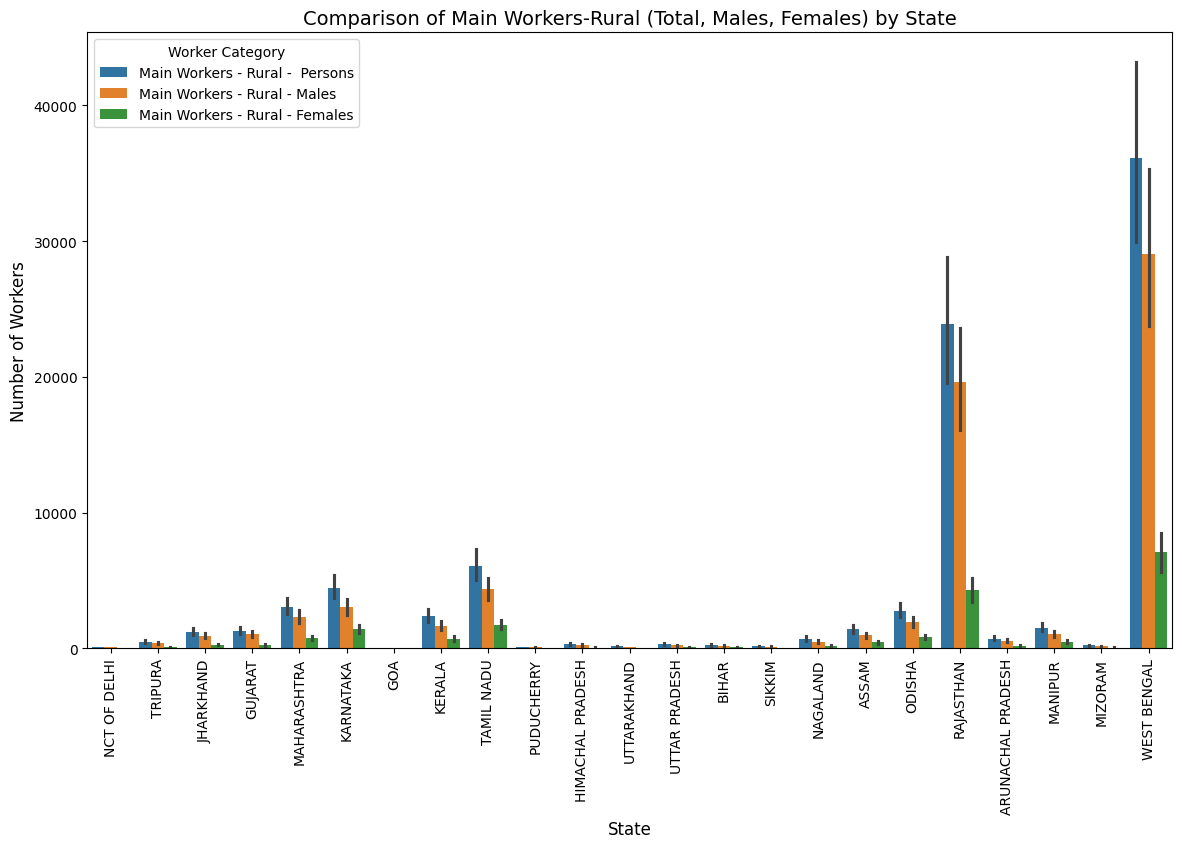

In [20]:
# Main Workers-Rural
# Set the figure size
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=merged_df.melt(id_vars=['State Name'], value_vars=['Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females']), 
            x='State Name', y='value', hue='variable')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.title('Comparison of Main Workers-Rural (Total, Males, Females) by State', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.legend(title='Worker Category')

# Show the plot
plt.show()


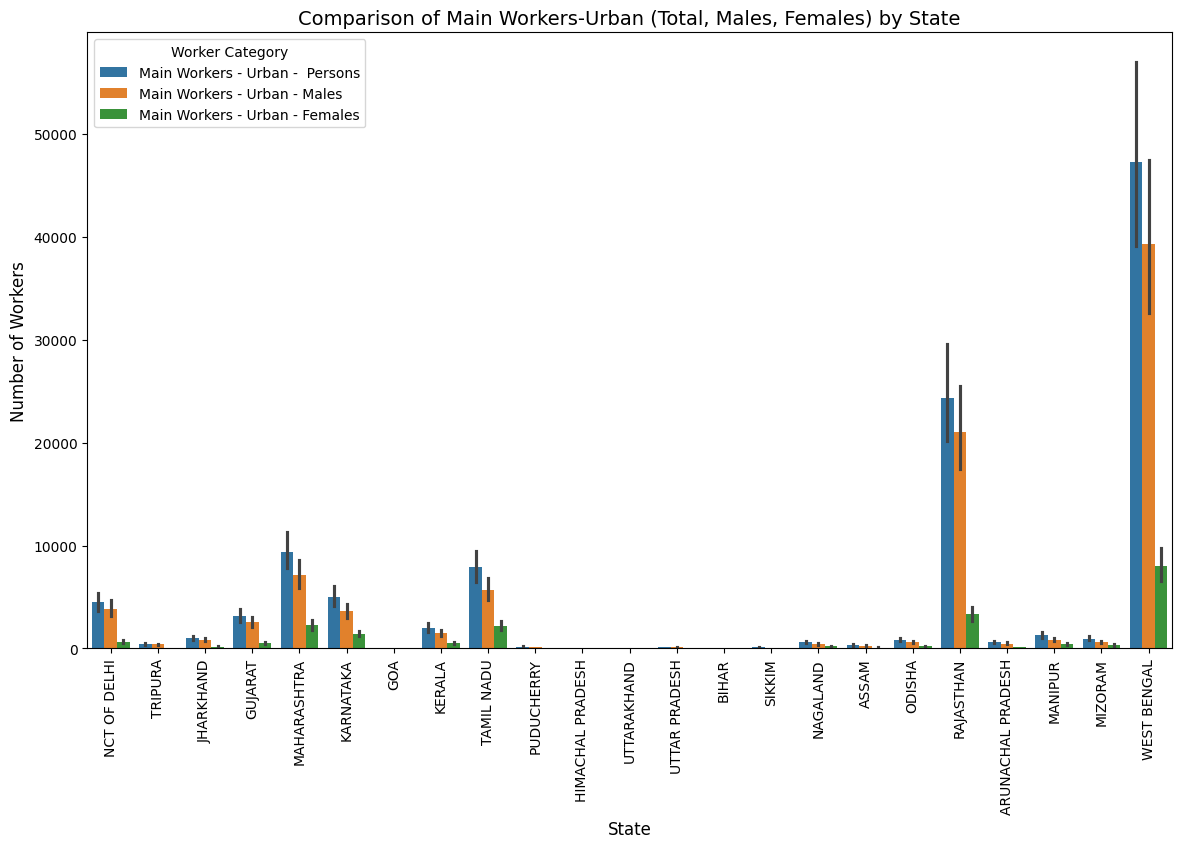

In [21]:
# Main Workers-Urban
# Set the figure size
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=merged_df.melt(id_vars=['State Name'], value_vars=['Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females']), 
            x='State Name', y='value', hue='variable')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.title('Comparison of Main Workers-Urban (Total, Males, Females) by State', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.legend(title='Worker Category')

# Show the plot
plt.show()

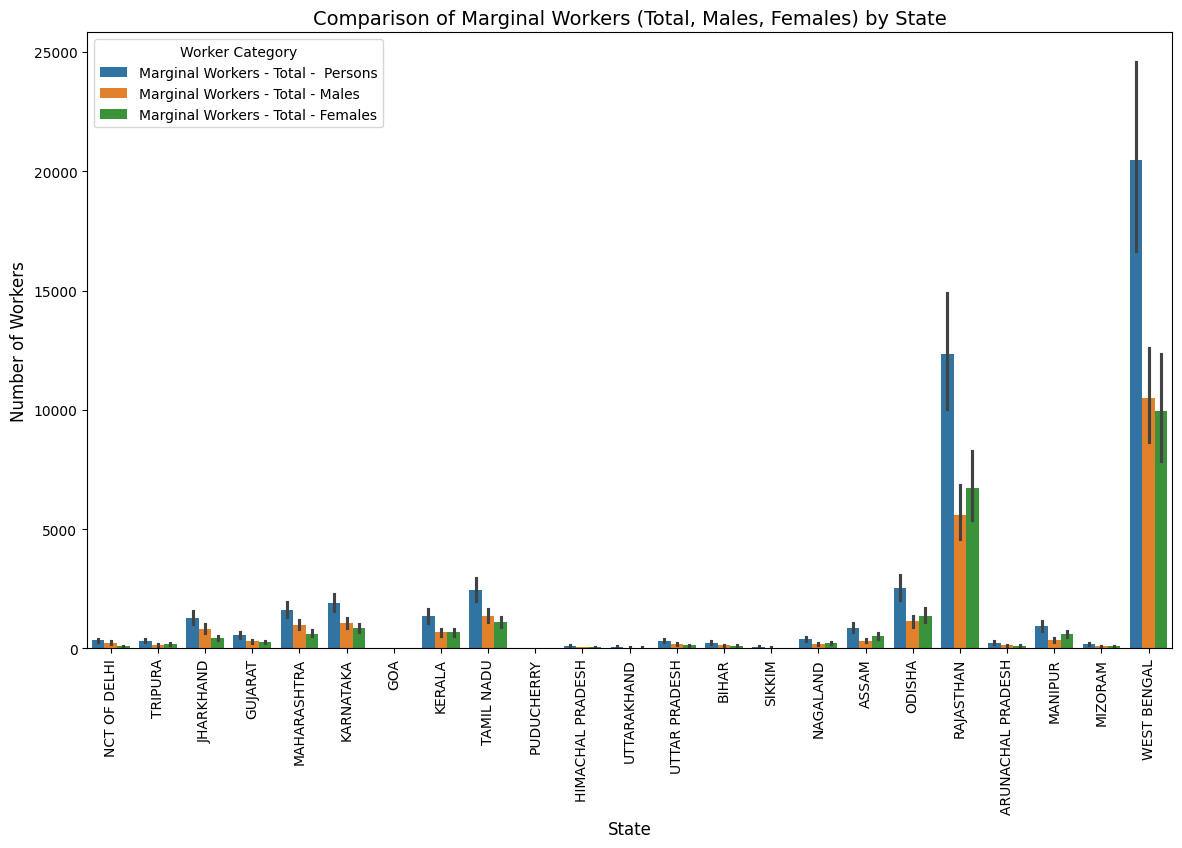

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Marginal Workers-Total
# Set the figure size
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=merged_df.melt(id_vars=['State Name'], value_vars=['Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']), 
            x='State Name', y='value', hue='variable')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.title('Comparison of Marginal Workers (Total, Males, Females) by State', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.legend(title='Worker Category')

# Show the plot
plt.show()

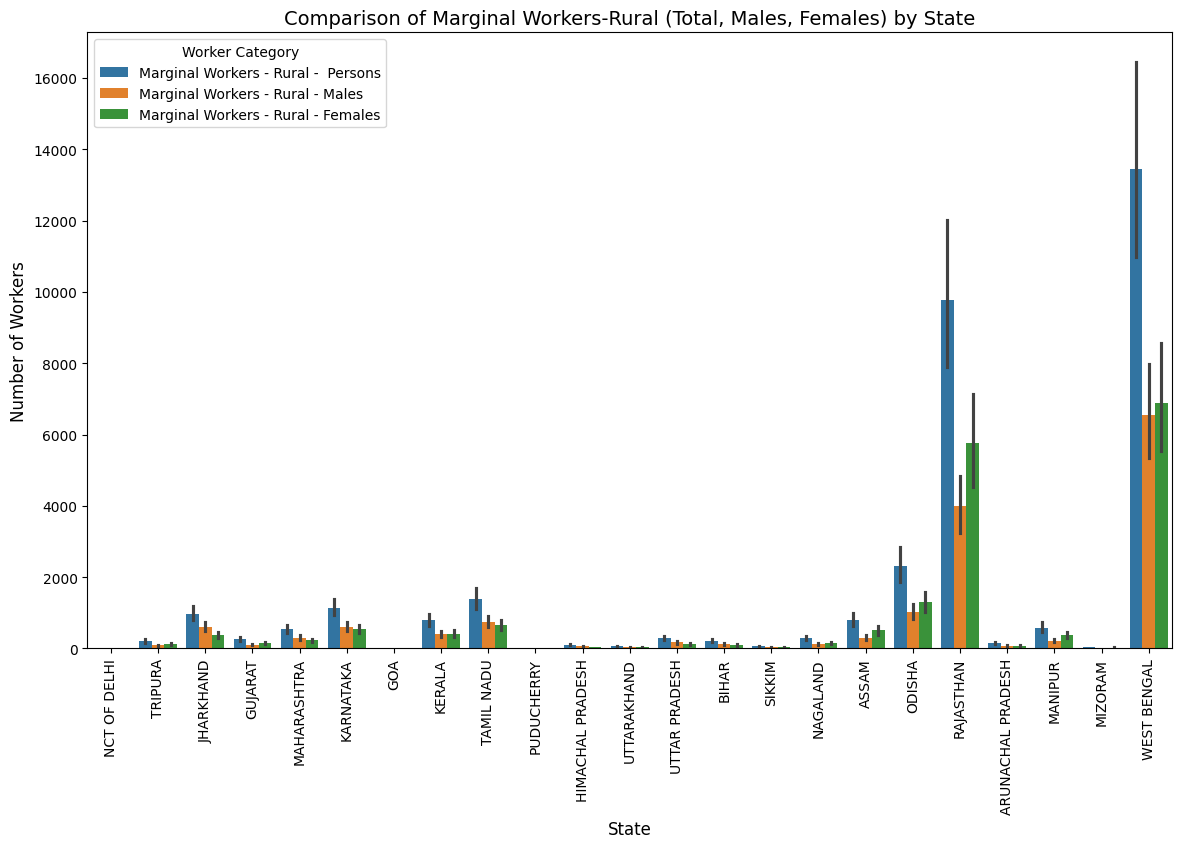

In [23]:
# Marginal Workers-Rural
# Set the figure size
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=merged_df.melt(id_vars=['State Name'], value_vars=['Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females']), 
            x='State Name', y='value', hue='variable')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.title('Comparison of Marginal Workers-Rural (Total, Males, Females) by State', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.legend(title='Worker Category')

# Show the plot
plt.show()

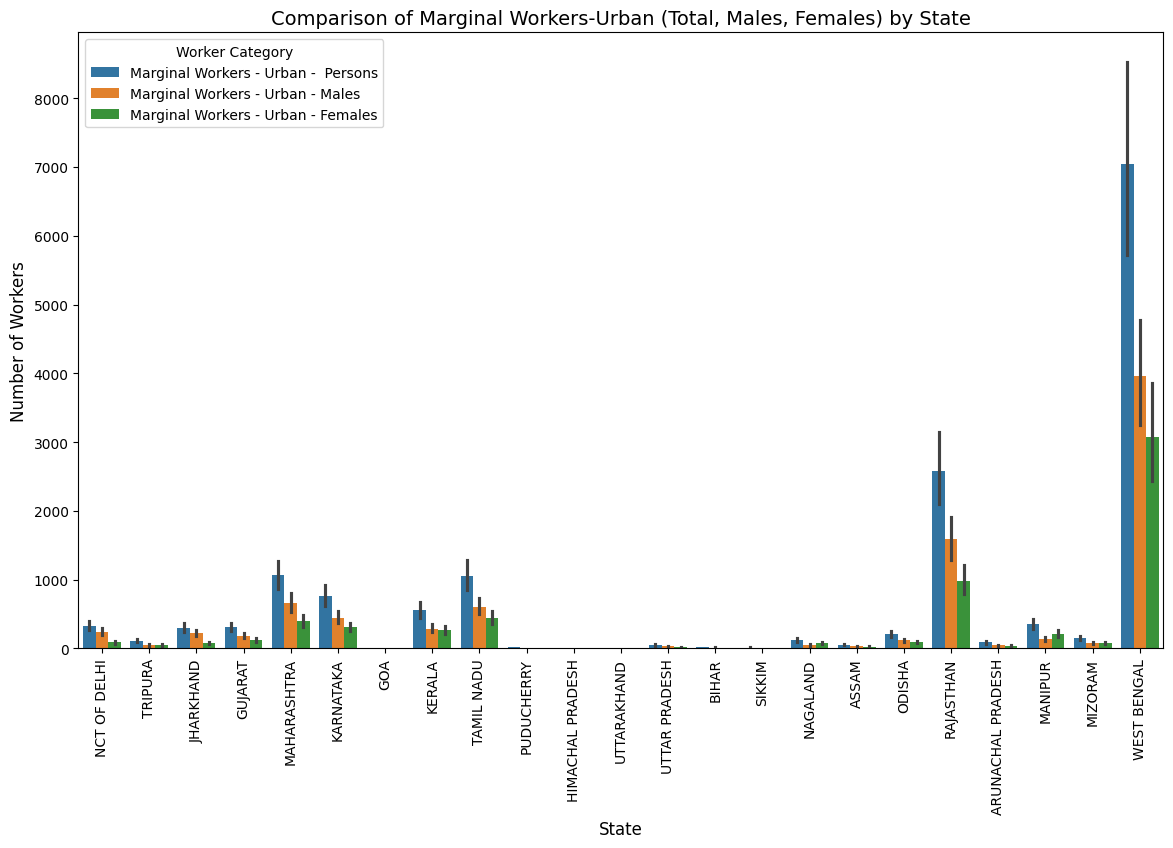

In [24]:
# Marginal Workers-Urban
# Set the figure size
plt.figure(figsize=(14, 8))

# Create grouped bar plot
sns.barplot(data=merged_df.melt(id_vars=['State Name'], value_vars=['Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females']), 
            x='State Name', y='value', hue='variable')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.title('Comparison of Marginal Workers-Urban (Total, Males, Females) by State', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.legend(title='Worker Category')

# Show the plot
plt.show()

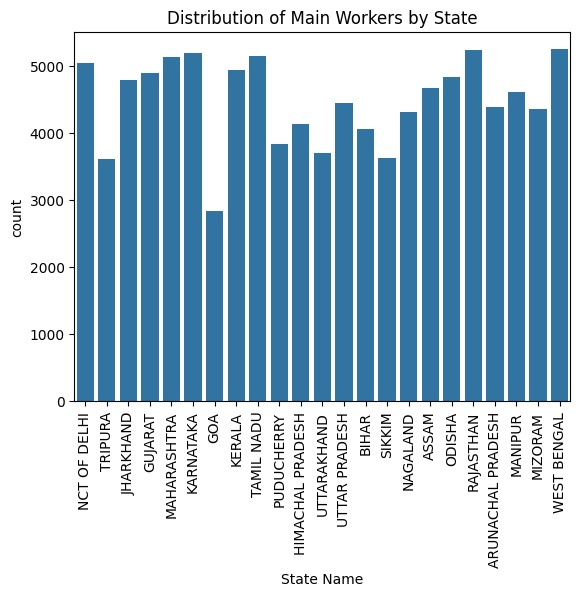

In [25]:
# Count plot for a categorical column
sns.countplot(x='State Name', data=merged_df)
plt.xticks(rotation=90)
plt.title('Distribution of Main Workers by State')
plt.show()

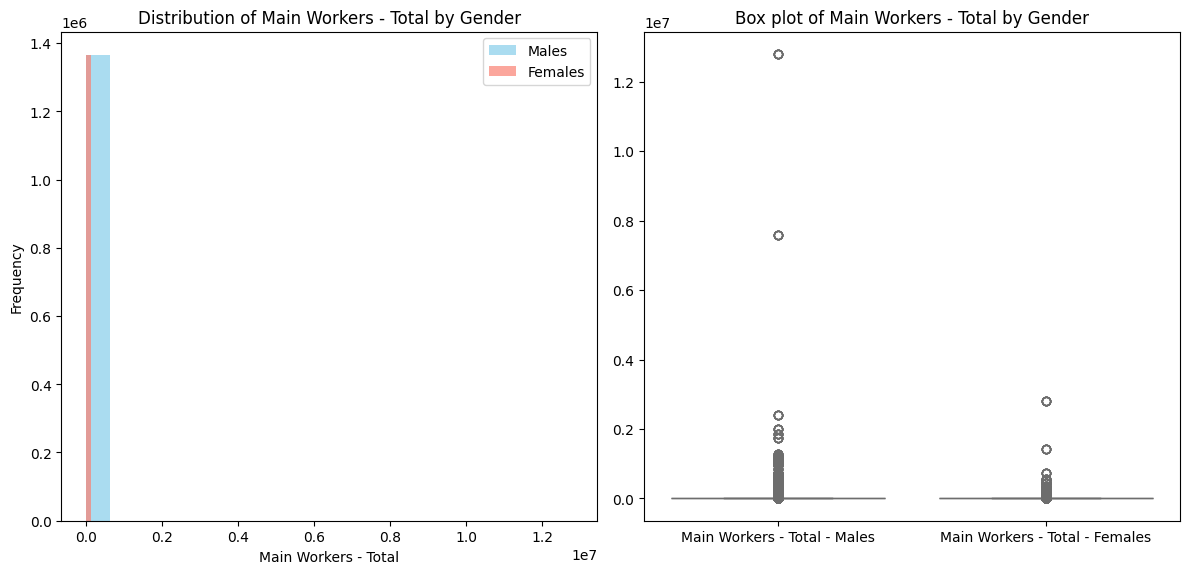

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Main Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(merged_df['Main Workers - Total - Males'], bins=20, color='skyblue', alpha=0.7, label='Males')
plt.hist(merged_df['Main Workers - Total - Females'], bins=20, color='salmon', alpha=0.7, label='Females')
plt.xlabel('Main Workers - Total')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total by Gender')
plt.legend()

# Box plot for 'Main Workers - Total - Persons'
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df[['Main Workers - Total - Males', 'Main Workers - Total - Females']], palette=['skyblue', 'salmon'])
plt.title('Box plot of Main Workers - Total by Gender')

plt.tight_layout()
plt.show()

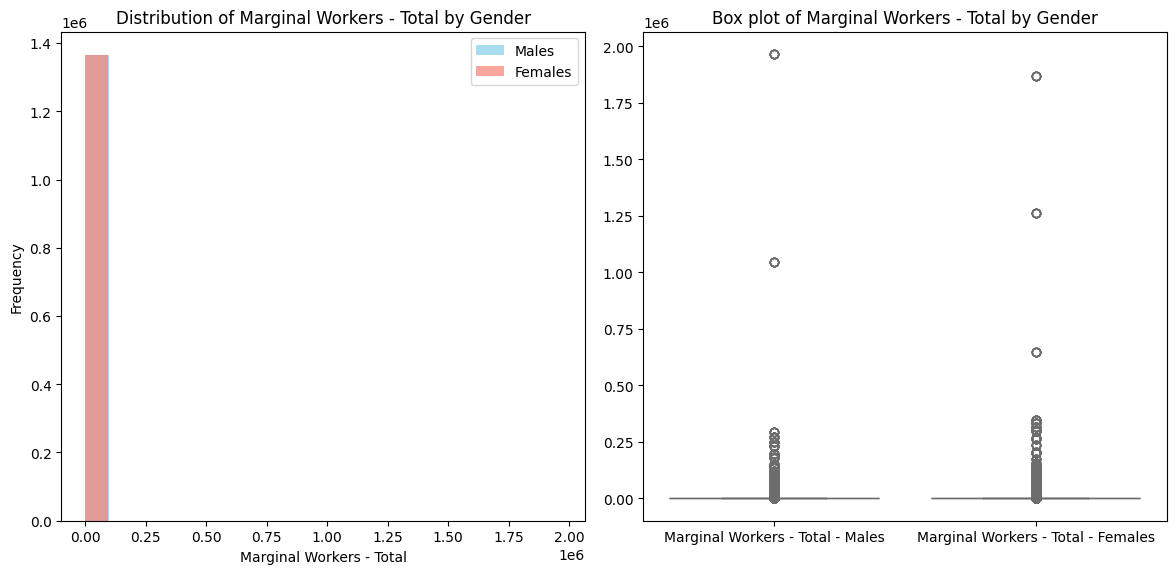

In [27]:
# Histogram for 'Marginal Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(merged_df['Marginal Workers - Total - Males'], bins=20, color='skyblue', alpha=0.7, label='Males')
plt.hist(merged_df['Marginal Workers - Total - Females'], bins=20, color='salmon', alpha=0.7, label='Females')
plt.xlabel('Marginal Workers - Total')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Total by Gender')
plt.legend()

# Box plot for 'Marginal Workers - Total - Persons'
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df[['Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']], palette=['skyblue', 'salmon'])
plt.title('Box plot of Marginal Workers - Total by Gender')

plt.tight_layout()
plt.show()

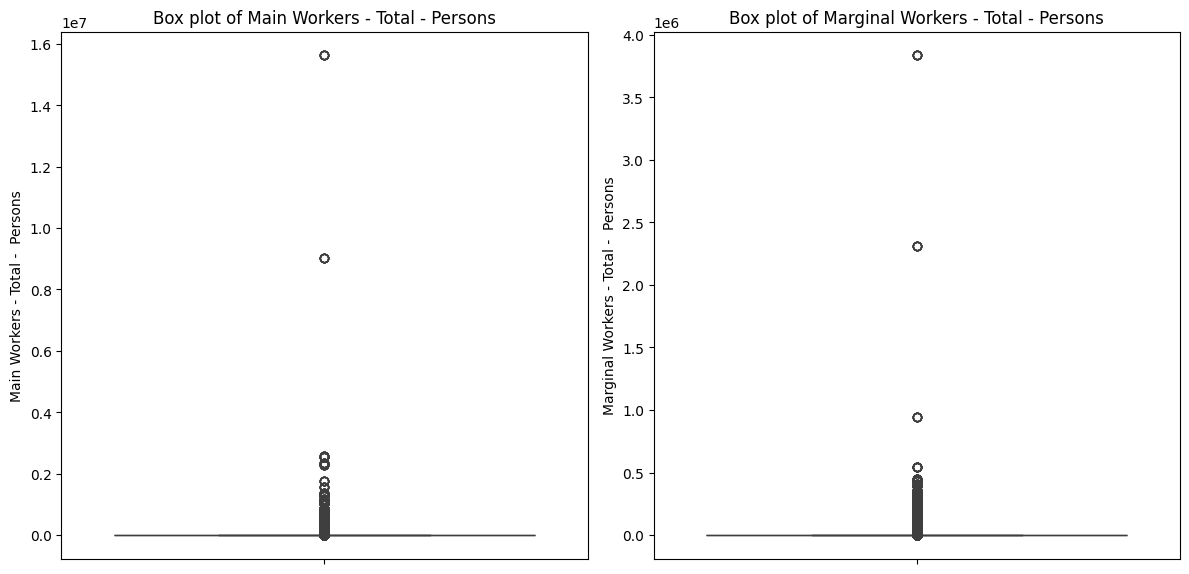

In [28]:
# Box plot for 'Main Workers - Total - Persons' and 'Marginal Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=merged_df['Main Workers - Total -  Persons'])
plt.title('Box plot of Main Workers - Total - Persons')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df['Marginal Workers - Total -  Persons'])
plt.title('Box plot of Marginal Workers - Total - Persons')
plt.tight_layout()
plt.show()

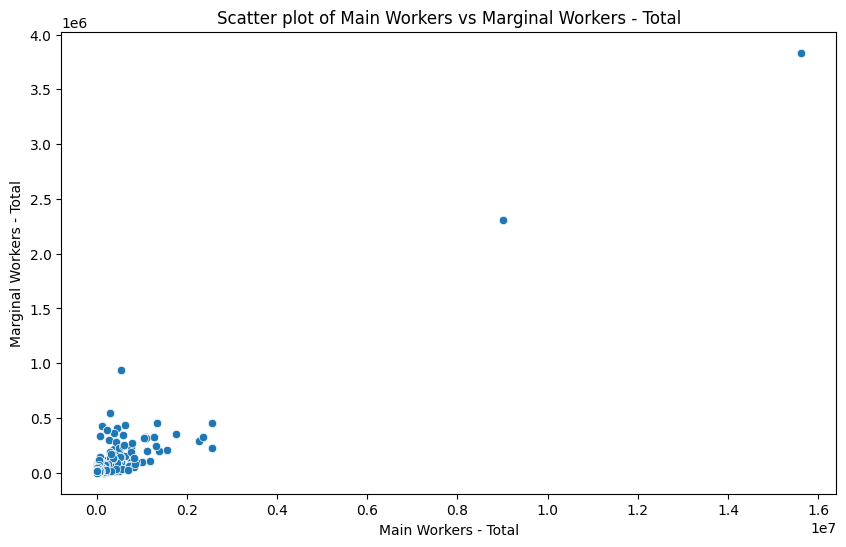

In [29]:
# Scatter plot for 'Main Workers - Total' vs 'Marginal Workers - Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Marginal Workers - Total -  Persons', data=merged_df)
plt.title('Scatter plot of Main Workers vs Marginal Workers - Total')
plt.xlabel('Main Workers - Total')
plt.ylabel('Marginal Workers - Total')
plt.show()

In [30]:
# Visual inspection of distributions
# Statistical methods like Z-score or IQR can be applied as well
# For example, using Z-score to identify and filter outliers
from scipy import stats
import numpy as np
z_scores = stats.zscore(merged_df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
merged_df = merged_df[filtered_entries]

In [31]:
merged_df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name,Total_workers
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,23,13,10,201,137,64,STATE,NCT OF DELHI,NCT OF DELHI,1708
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,14,12,2,78,53,25,STATE,NCT OF DELHI,NCT OF DELHI,261
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,8,6,2,29,21,8,STATE,NCT OF DELHI,NCT OF DELHI,120
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,STATE,NCT OF DELHI,NCT OF DELHI,9
5,`07,`000,STATE - NCT OF DELHI,`01,`011,`0113,"Growing of vegetables and melons, roots and tu...",42,34,8,...,6,6,0,46,29,17,STATE,NCT OF DELHI,NCT OF DELHI,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366007,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,9,0,9,4,0,4,District,Purba Medinipur,None,13
1366009,`19,`345,District - Purba Medinipur,`99,`990,`0000,Activities of extraterritorial organizations a...,18,12,6,...,0,0,0,0,0,0,District,Purba Medinipur,None,18
1366010,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,0,0,0,0,0,0,District,Purba Medinipur,None,18
1366013,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,13204,2934,10270,1668,418,1250,District,Purba Medinipur,None,23196


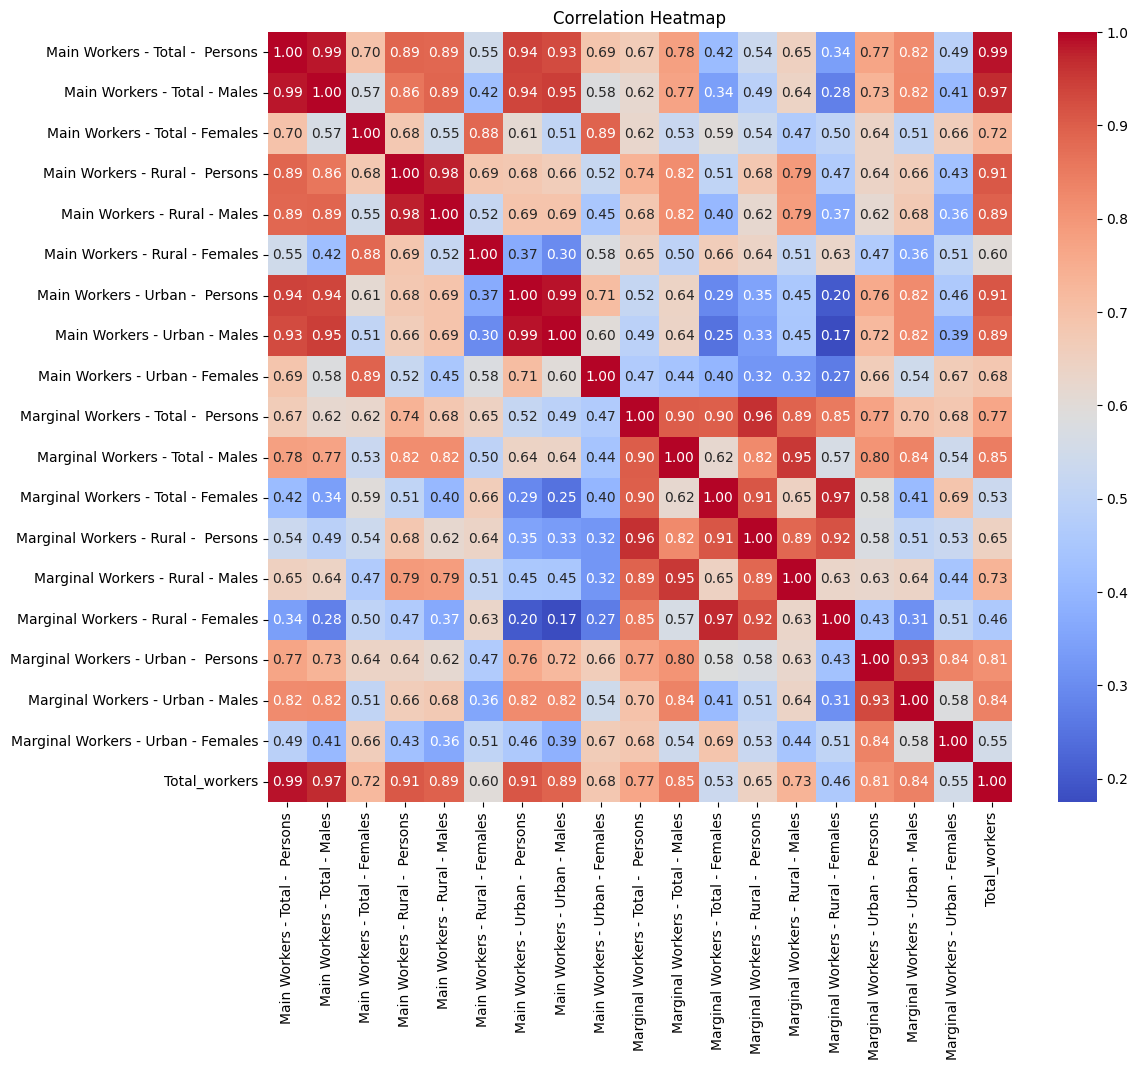

In [32]:
# Exclude non-numeric columns from the correlation calculation
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# Remove duplicate rows from the DataFrame
merged_df = merged_df.drop_duplicates()

# Confirm the removal of duplicates
print("Shape after removing duplicates:", merged_df.shape)

Shape after removing duplicates: (194381, 29)


NLP

Step 1: Tokenize and Clean Text Data

In [34]:
pip install nltk

In [35]:
pip install wordcloud

In [36]:
pip install word_tokenizer

In [37]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

Text cleaning

Remove unnecessary characters (punctuation, numbers, special characters).

Convert text to lowercase for uniformity.

In [38]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Apply cleaning to NIC Name column
merged_df['NIC Name Cleaned'] = merged_df['NIC Name'].apply(clean_text)


C:\Users\hp\AppData\Local\Temp\ipykernel_12740\3682035237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['NIC Name Cleaned'] = merged_df['NIC Name'].apply(clean_text)


In [ ]:
merged_df['NIC Name Cleaned'].unique

<bound method Series.unique of 1         crop and animal production hunting and related...
2                             growing of nonperennial crops
3         growing of cereals except rice leguminous crop...
4                                           growing of rice
5         growing of vegetables and melons roots and tubers
                                ...                        
195137    undifferentiated serviceproducing activities o...
195139    activities of extraterritorial organizations a...
195140    activities of extraterritorial organizations a...
195143             incomplete description wrongly classifed
195144             incomplete description wrongly classifed
Name: NIC Name Cleaned, Length: 194381, dtype: object>

In [40]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Explanation: TF-IDF Vectorization: Converts the text data in the 'NIC Name' column into a numerical format.

Scaling Numerical Data: Scales other numerical columns to ensure they contribute equally to the clustering process.

Combining Features: Combines the TF-IDF features with the scaled numerical data.

Clustering: Applies KMeans clustering to the combined features.

Visualizations: Creates scatter plots and box plots to visualize the distribution of clusters and the relationship between various features.

Step 2: Vectorize the Text Data

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [42]:
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(merged_df['NIC Name Cleaned'])

Step 3: Apply Clustering Algorithm

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 2: Scale the numerical columns for clustering
scaler = StandardScaler()
numerical_columns = [
    'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
    'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females',
    'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females'
]
numerical_data_scaled = scaler.fit_transform(merged_df[numerical_columns])

# Step 3: Combine TF-IDF features with scaled numerical data
from scipy.sparse import hstack
combined_features = hstack([nic_name_tfidf, numerical_data_scaled])

# Step 4: Determine the number of clusters and fit the KMeans model
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(combined_features)

C:\Users\hp\AppData\Local\Temp\ipykernel_12740\679829968.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Cluster'] = kmeans.fit_predict(combined_features)


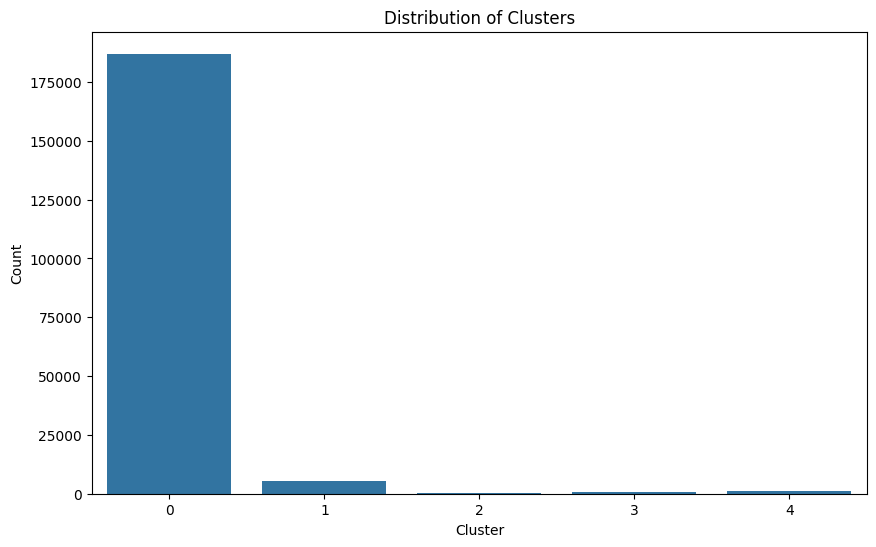

In [44]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=merged_df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Main Workers

Step 1: Identify Top 10 Most Frequent 'NIC Name' Categories

In [45]:
# Count the frequency of each 'NIC Name'
nic_name_counts = merged_df['NIC Name Cleaned'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()

In [46]:
top_10_nic_names

['construction of buildings',
 'activities of households as employers of domestic personnel',
 'manufacture of furniture',
 'water collection treatment and supply',
 'veterinary activities',
 'incomplete description wrongly classifed',
 'primary education',
 'manufacture of tobacco products',
 'other human health activities',
 'blank']

Step 2: Filter the DataFrame to Include Only Top 10 'NIC Name' Categories

In [47]:
# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_merged_df = merged_df[merged_df['NIC Name Cleaned'].isin(top_10_nic_names)]

In [48]:
top_10_merged_df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name,Total_workers,NIC Name Cleaned,Cluster
98,`07,`000,STATE - NCT OF DELHI,`12,`000,`0000,Manufacture of tobacco products,147,123,24,...,0,20,5,15,STATE,NCT OF DELHI,NCT OF DELHI,167,manufacture of tobacco products,0
99,`07,`000,STATE - NCT OF DELHI,`12,`120,`0000,Manufacture of tobacco products,147,123,24,...,0,20,5,15,STATE,NCT OF DELHI,NCT OF DELHI,167,manufacture of tobacco products,0
100,`07,`000,STATE - NCT OF DELHI,`12,`120,`1200,Manufacture of tobacco products,147,123,24,...,0,20,5,15,STATE,NCT OF DELHI,NCT OF DELHI,167,manufacture of tobacco products,0
269,`07,`000,STATE - NCT OF DELHI,`31,`000,`0000,Manufacture of furniture,2291,2233,58,...,1,163,158,5,STATE,NCT OF DELHI,NCT OF DELHI,2461,manufacture of furniture,0
270,`07,`000,STATE - NCT OF DELHI,`31,`310,`0000,Manufacture of furniture,2291,2233,58,...,1,163,158,5,STATE,NCT OF DELHI,NCT OF DELHI,2461,manufacture of furniture,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195130,`19,`345,District - Purba Medinipur,`97,`000,`0000,Activities of households as employers of domes...,5726,1495,4231,...,1671,726,110,616,District,Purba Medinipur,None,8802,activities of households as employers of domes...,1
195131,`19,`345,District - Purba Medinipur,`97,`970,`0000,Activities of households as employers of domes...,5726,1495,4231,...,1671,726,110,616,District,Purba Medinipur,None,8802,activities of households as employers of domes...,1
195132,`19,`345,District - Purba Medinipur,`97,`970,`9700,Activities of households as employers of domes...,5726,1495,4231,...,1671,726,110,616,District,Purba Medinipur,None,8802,activities of households as employers of domes...,1
195143,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,10270,1668,418,1250,District,Purba Medinipur,None,23196,incomplete description wrongly classifed,3


Step 3: Create the Box Plot

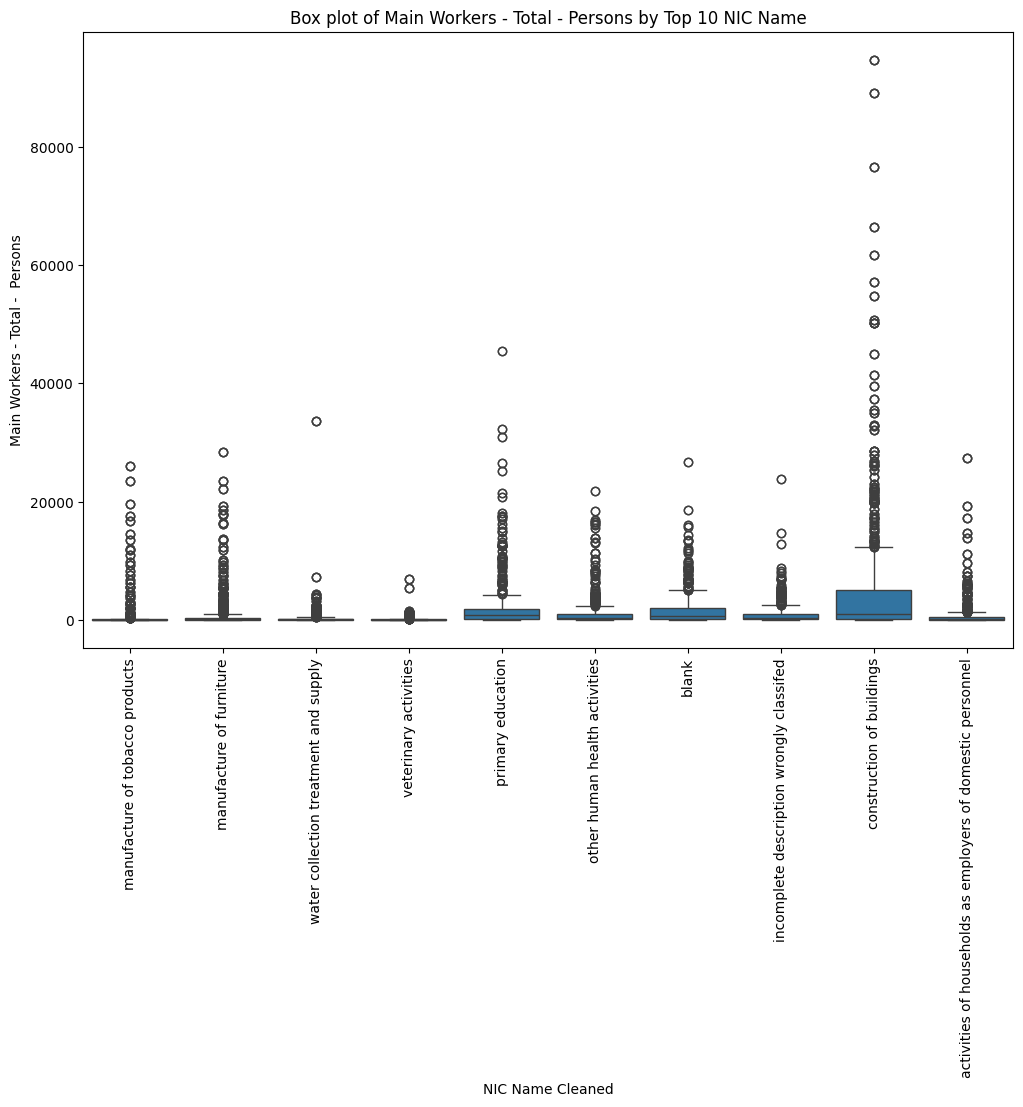

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Main Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name Cleaned', y='Main Workers - Total -  Persons', data=top_10_merged_df)
plt.title('Box plot of Main Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()

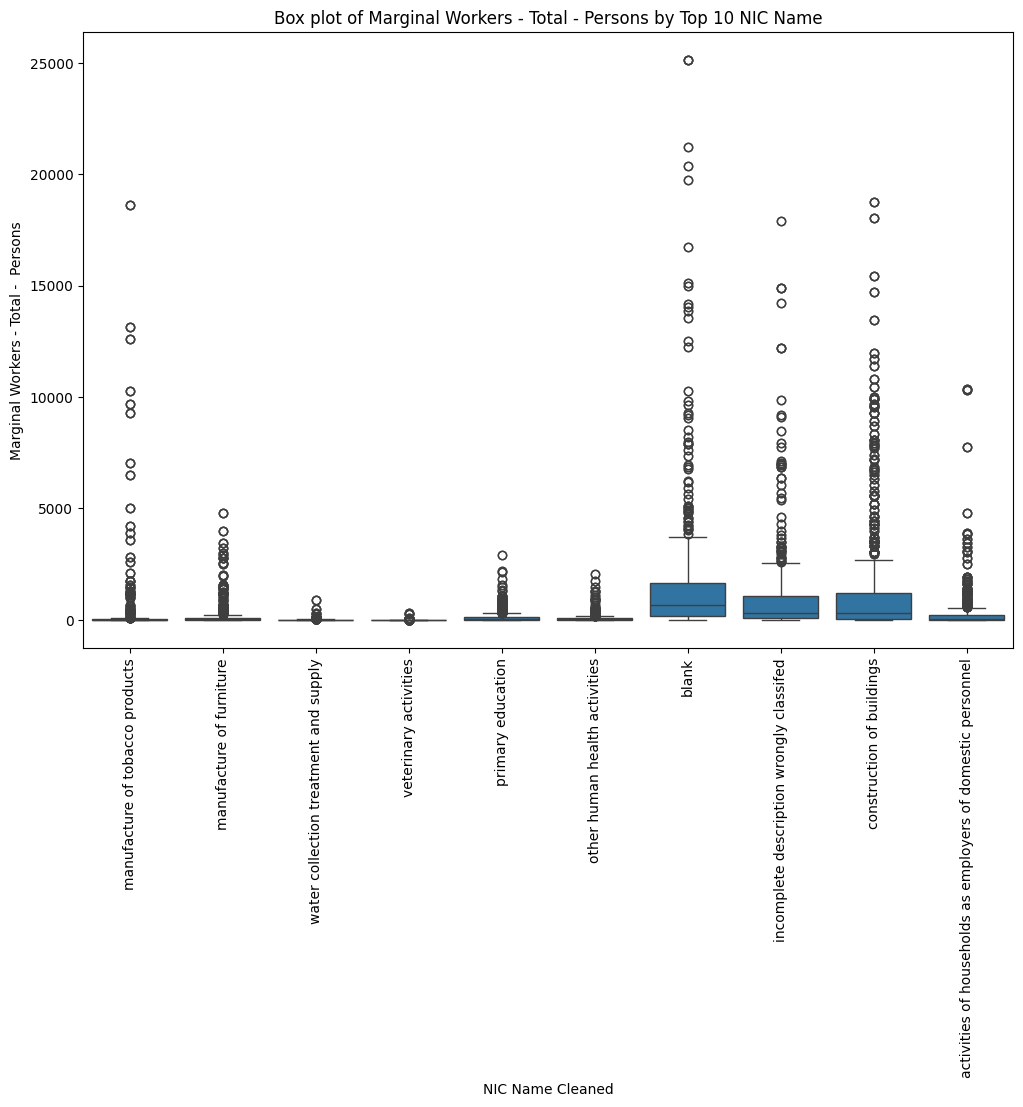

In [50]:
# Box plot for 'Marginal Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name Cleaned', y='Marginal Workers - Total -  Persons', data=top_10_merged_df)
plt.title('Box plot of Marginal Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()

Removing Columns

In [51]:
columns_to_drop = ["State Code", "District Code" ,"NIC Name"]
merged_df = merged_df.drop(columns=columns_to_drop)

In [52]:
import pandas as pd

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['India/States', 'Division', 'Group', 'Class', 'STATE', 'District', 'State Name', 'NIC Name Cleaned']


ENCODING

In [56]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
merged_df['India/States']=encoding.fit_transform(merged_df['India/States'])
merged_df['STATE']=encoding.fit_transform(merged_df['STATE'])
merged_df['District']=encoding.fit_transform(merged_df['District'])
merged_df['State Name']=encoding.fit_transform(merged_df['State Name'])
merged_df['NIC Name Cleaned']=encoding.fit_transform(merged_df['NIC Name Cleaned'])
merged_df['Division']=encoding.fit_transform(merged_df['Division'])
merged_df['Group']=encoding.fit_transform(merged_df['Group'])
merged_df['Class']=encoding.fit_transform(merged_df['Class'])


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194381 entries, 1 to 195144
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   India/States                         194381 non-null  int64
 1   Division                             194381 non-null  int32
 2   Group                                194381 non-null  int32
 3   Class                                194381 non-null  int32
 4   Main Workers - Total -  Persons      194381 non-null  int64
 5   Main Workers - Total - Males         194381 non-null  int64
 6   Main Workers - Total - Females       194381 non-null  int64
 7   Main Workers - Rural -  Persons      194381 non-null  int64
 8   Main Workers - Rural - Males         194381 non-null  int64
 9   Main Workers - Rural - Females       194381 non-null  int64
 10  Main Workers - Urban -  Persons      194381 non-null  int64
 11  Main Workers - Urban - Males         194381 

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual dataset)
# Assuming merged_df is the dataframe you are working with
df = merged_df

# Encoding categorical features

# Defining the target and features
X = df.drop(columns=['Class']) # Features

# Replace 'Target_Column' with the actual column you're predicting
y = df['Class']  # Target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))





NameError: name 'merged_df' is not defined

In [ ]:
# Step 6: Save the model (optional)
import joblib
joblib.dump(clf, 'random_forest_classifier_model.pkl')